In [39]:
# Step 1: Librerie necessarie
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [40]:
# Step 2: Funzione per calcolo sentiment
def calculate_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores

In [51]:
sentences = [
    # "VADER is smart, handsome, and funny.",  # positive sentence example
    # "VADER is not smart, handsome, nor funny.",  # negation sentence example
    # "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
    # "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
    # "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
    # "VADER is VERY SMART, handsome, and FUNNY!!!",  # combination of signals - VADER appropriately adjusts intensity
    # "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!",  # booster words & punctuation make this close to ceiling for score
    # "The book was good.",  # positive sentence
    # "The book was kind of good.",  # qualified positive sentence is handled correctly (intensity adjusted)
    # "The plot was good, but the characters are uncompelling and the dialog is not great.",  # mixed negation sentence
    # "At least it isn't a horrible book.",  # negated negative sentence with contraction
    # "Make sure you :) or :D today!",  # emoticons handled
    # "Today SUX!",  # negative slang with capitalization emphasis
    # "Today only kinda sux! But I'll get by, lol",  # mixed sentiment example with slang and constrastive conjunction "but"
    # "The weather is lousy today",  # mixed sentiment with contrastive conjunction
    # "The family adopted those puppies. ",
    "Last break, I completed all of my homework ahead of time. "
    "Last night I did a lot of homework. ",
    "know that I should enter the haunted house at my own risk.",
    "I love action movies, not boring dramas.",
    "I watched a movie last night and the actor was good.",
    "My teacher is a good advisior.",
    "Alcohol is not always good.",
    "I tend to exercise after class.",
    "Last night, there was an accident and traffic was horrible.",
    "I watched a movie last night. I was really scared.",
    "My mom is getting old.",
    "Age isn't important.",
    "My ancestors are from Germany.",
    "I watched a movie last night and the actor was good.",
    "I was picked to join the club. Wow, it was an honor.",
    "I love riding in airplanes and flying different places.",
    "My ancestors are from Germany.",
    "Last night, there was an accident and traffic was horrible.",
    "My boss works in an office right above me.",
    "I have an appointment this afternoon with my teacher.",
    "I asked my teacher for some advice and we had a discussion.",
    "I noticed my sister acting strange.",
    "Last night I did a lot of homework.",
    "My boss works in an office right above me.",
    "I got a D in the class; I accepted it.",
    "I watched a movie last night and the actor was good.",
    "I noticed my sister acting strange.",
    "I love action movies, not boring dramas.",
    "I asked my teacher for some advice and we had a discussion.",
    "My teacher is a good advisior.",
    "I watched a movie last night. I was really scared.",
    "This afternoon I'm going to the store.",
]

In [52]:
# Step 3: Estrarre punteggi di sentiment
analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

Last break, I completed all of my homework ahead of time. Last night I did a lot of homework.  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
know that I should enter the haunted house at my own risk.------- {'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'compound': -0.6369}
I love action movies, not boring dramas.------------------------- {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.7321}
I watched a movie last night and the actor was good.------------- {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}
My teacher is a good advisior.----------------------------------- {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}
Alcohol is not always good.-------------------------------------- {'neg': 0.376, 'neu': 0.624, 'pos': 0.0, 'compound': -0.3412}
I tend to exercise after class.---------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Last night, there was an accident and traffic was horrible.------ {'neg': 0.452, 'neu': 0.548,

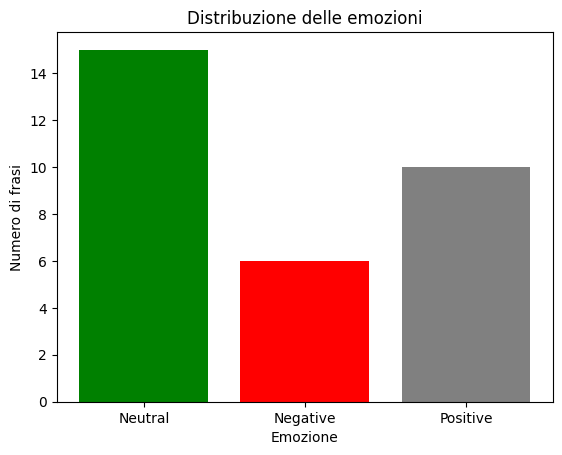

In [57]:
# Step 4: Visualizza la distribuzione delle emozioni
import matplotlib.pyplot as plt

# Calcola il sentiment per ogni frase
results = [analyzer.polarity_scores(sentence) for sentence in sentences]

# Conta quante frasi sono positive, negative o neutre
emotion_labels = []
for res in results:
    if res["compound"] >= 0.25:
        emotion_labels.append("Positive")
    elif res["compound"] <= -0.25:
        emotion_labels.append("Negative")
    else:
        emotion_labels.append("Neutral")

# Conta le occorrenze
from collections import Counter

counts = Counter(emotion_labels)

# Crea il grafico
plt.bar(counts.keys(), counts.values(), color=["green", "red", "gray"])
plt.title("Distribuzione delle emozioni")
plt.xlabel("Emozione")
plt.ylabel("Numero di frasi")
plt.show()

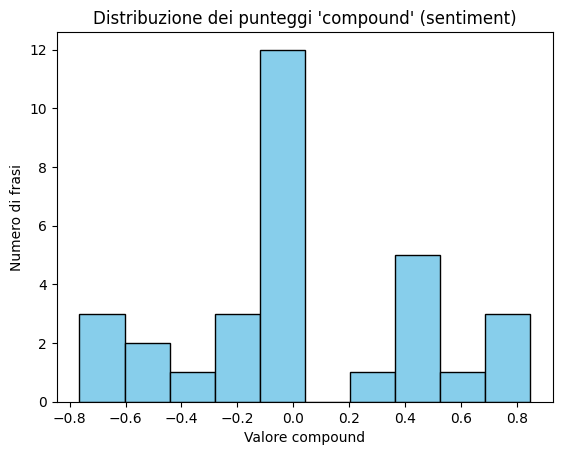

In [58]:
# Estrai tutti i valori 'compound'
compound_scores = [res["compound"] for res in results]

# Crea l'istogramma
plt.hist(compound_scores, bins=10, color="skyblue", edgecolor="black")
plt.title("Distribuzione dei punteggi 'compound' (sentiment)")
plt.xlabel("Valore compound")
plt.ylabel("Numero di frasi")
plt.show()